In [1]:
import numpy as np
import pandas as pd
import textwrap
import nltk
import os
import re

#DR
from sklearn.datasets._twenty_newsgroups import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from sklearn.preprocessing import LabelEncoder
from gensim.corpora import Dictionary
from nltk.stem import WordNetLemmatizer, SnowballStemmer
snowball = SnowballStemmer(language='english')
from nltk.tokenize import RegexpTokenizer

#MachineLearning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [2]:
def preprocess(texts):
    for n in range(0, len(texts)):
        text = texts[n]
        text = word_tokenize(text)
        text = [word.lower() for word in text]
        text = [word for word in text if word not in stop_words]
        text = [word for word in text if word.isalpha()]
        text = [porter.stem(word) for word in text]
        text = " ".join(text)
        texts[n] = text
    return texts

In [3]:
# def merge(x):
#     return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [4]:
BBClabels = [] #y
BBCX = []

for dirname, _ , filenames in os.walk('D:Year 3 Sem 1/Text Mining/Assignment/bbc/'):
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
          if filename.endswith(".txt"):
                BBClabels.append(dirname.split("/")[-1])
                fullpathfile = os.path.join(dirname,filename)
                with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
                    intext = ''
                    for line in infile:
                        intext = intext + ' ' + line
                    BBCX.append(intext)


In [5]:

#vectorizer = CountVectorizer()

In [6]:
# dictionary = Dictionary(BBCdfpp)

In [7]:
BBCdf = pd.DataFrame(list(zip(BBCX, BBClabels)), 
               columns =['text', 'labels'])


BBCdf.head()

,text,labels
0,Ad sales boost Time Warner profit\n \n Quarte...,business
1,Dollar gains on Greenspan speech\n \n The dol...,business
2,Yukos unit buyer faces loan claim\n \n The ow...,business
3,High fuel prices hit BA's profits\n \n Britis...,business
4,Pernod takeover talk lifts Domecq\n \n Shares...,business


In [8]:
for label in np.unique(BBCdf['labels']):
    print(label)

business
entertainment
politics
sport
tech


In [9]:
BBCdf.shape

(2225, 2)

In [10]:
BBCdf.isnull().sum()

text      0
labels    0
dtype: int64

In [11]:
# LE = LabelEncoder()
# # BBCdf.labels = pd.Categorical(BBCdf.labels)

# BBCdf['labels'] = LE.fit_transform(BBCdf['labels'])

In [12]:
# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# def clean_text(text):
#     """
#         text: a string
        
#         return: modified initial string
#     """
#     text = text.lower() # lowercase text
#     text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
#     text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
# #   text = re.sub(r'\W+', '', text)
#     text = ' '.join(word for word in text.split() if word not in stop_words) # remove stopwors from text
#     return text

In [13]:
# BBCdf['text'] = BBCdf['text'].apply(clean_text)
# BBCdf['text'] = BBCdf['text'].str.replace('\d+', '')
# BBCdf.head()

In [14]:
BBCdf.head()

,text,labels
0,Ad sales boost Time Warner profit\n \n Quarte...,business
1,Dollar gains on Greenspan speech\n \n The dol...,business
2,Yukos unit buyer faces loan claim\n \n The ow...,business
3,High fuel prices hit BA's profits\n \n Britis...,business
4,Pernod takeover talk lifts Domecq\n \n Shares...,business


In [15]:
# bbcXX = np.array(BBCdf['text'])

In [16]:
# bbcXpp = preprocess(bbcXX)

# NewsGroup

In [17]:
remove = ('headers', 'footers', 'quotes')

In [18]:
# category = ['alt.atheism',
#  'comp.graphics',
#  'comp.os.ms-windows.misc',
#  'comp.sys.ibm.pc.hardware',
#  'comp.sys.mac.hardware',
#  'comp.windows.x',
#  'misc.forsale',
#  'rec.autos',
#  'rec.motorcycles',
#  'rec.sport.baseball',
#  'rec.sport.hockey',
#  'sci.crypt',
#  'sci.electronics',
#  'sci.med',
#  'sci.space',
#  'soc.religion.christian',
#  'talk.politics.guns',
#  'talk.politics.mideast',
#  'talk.politics.misc',
#  'talk.religion.misc']

category = ['comp.sys.ibm.pc.hardware',
            'comp.windows.x','rec.autos','talk.politics.misc',]

In [19]:
twenNews = fetch_20newsgroups(categories=category, remove=remove) 
#twenPP = preprocess(twenNews.data)

In [20]:
twenNewsDF= pd.Series(twenNews.data) 
twenNewsDF =pd.DataFrame(twenNewsDF) 
twenNewsDF.columns = ['text'] + twenNewsDF.columns.tolist()[1:] 
twenNewsDF['labels'] = pd.Series(twenNews.target)

In [21]:
twenNewsDF.head()

,text,labels
0,\n\nTry this:\n\nchar *name=NULL;\nunsigned lo...,1
1,"}Crazy question: ""Anyone ever wonder how birds...",2
2,\nIt's not what they did that matters. It's w...,3
3,ajteel@dendrite.cs.Colorado.EDU (A.J. Teel) w...,3
4,\nHow about those toneau covers? I've been thi...,2


In [22]:
twenNewsDF.tail()

,text,labels
2237,"Hi,\n\nI am about to write an application in X...",1
2238,\n\nSomething that happened in South AFrica ab...,2
2239,\nThere is something going on here. It seems ...,2
2240,I have been unable to get COM 4 to work - diag...,0
2241,ites:,2


In [23]:
print(twenNewsDF.dtypes)

text      object
labels     int64
dtype: object


In [24]:
twenNewsDF['labels'] = twenNewsDF['labels'].astype(str)

In [25]:
print(twenNewsDF.dtypes)

text      object
labels    object
dtype: object


# Combine

In [26]:
dfCom = pd.concat([BBCdf,twenNewsDF],ignore_index=True)

In [27]:
dfCom.head()

,text,labels
0,Ad sales boost Time Warner profit\n \n Quarte...,business
1,Dollar gains on Greenspan speech\n \n The dol...,business
2,Yukos unit buyer faces loan claim\n \n The ow...,business
3,High fuel prices hit BA's profits\n \n Britis...,business
4,Pernod takeover talk lifts Domecq\n \n Shares...,business


In [28]:
dfCom.tail()

,text,labels
4462,"Hi,\n\nI am about to write an application in X...",1
4463,\n\nSomething that happened in South AFrica ab...,2
4464,\nThere is something going on here. It seems ...,2
4465,I have been unable to get COM 4 to work - diag...,0
4466,ites:,2


In [29]:
len(dfCom)

4467

In [30]:
dfCom.iloc[83:93,:]

,text,labels
83,Mexican in US send $16bn home\n \n Mexican la...,business
84,Home loan approvals rising again\n \n The num...,business
85,Manufacturing recovery 'slowing'\n \n UK manu...,business
86,Worldcom boss 'left books alone'\n \n Former ...,business
87,Metlife buys up Citigroup insurer\n \n US ban...,business
88,Europe blames US over weak dollar\n \n Europe...,business
89,French wine gets 70m euro top-up\n \n The Fre...,business
90,Russia gets investment blessing\n \n Soaring ...,business
91,Iranian MPs threaten mobile deal\n \n Turkey'...,business
92,Argentina closes $102.6bn debt swap\n \n Arge...,business


In [31]:
dfCom['number_of_stopwords'] = dfCom.text.apply(lambda x: len([i for i in x.split() if i in stop_words]))

In [32]:
dfCom.head()

,text,labels,number_of_stopwords
0,Ad sales boost Time Warner profit\n \n Quarte...,business,151
1,Dollar gains on Greenspan speech\n \n The dol...,business,138
2,Yukos unit buyer faces loan claim\n \n The ow...,business,100
3,High fuel prices hit BA's profits\n \n Britis...,business,129
4,Pernod takeover talk lifts Domecq\n \n Shares...,business,91


In [33]:
Total = dfCom['number_of_stopwords'].sum()
print("Total of stop words in the documents:", Total)

Total of stop words in the documents: 474615


In [34]:
print(dfCom.dtypes)

text                   object
labels                 object
number_of_stopwords     int64
dtype: object


In [35]:
LE = LabelEncoder()
# BBCdf.labels = pd.Categorical(BBCdf.labels)

dfCom['labels'] = LE.fit_transform(dfCom['labels'])

In [36]:
print(dfCom.dtypes)

text                   object
labels                  int32
number_of_stopwords     int64
dtype: object


In [37]:
# df_txt = np.array(dfCom['text'])


In [38]:
dfComPP = preprocess(dfCom.text)

C:\Users\rolld\AppData\Local\Temp\ipykernel_14272\3269742640.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts[n] = text


In [39]:
a = dfCom['text'].str.lower().str.cat(sep=' ')
b = dfComPP.str.cat(sep = ' ')
wordss = nltk.tokenize.word_tokenize(a)
wordssb = nltk.tokenize.word_tokenize(b)
word_dist = nltk.FreqDist(wordss)
word_distb = nltk.FreqDist(wordssb)

In [40]:
top_N = 10
print(word_dist)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

rsltb = pd.DataFrame(word_distb.most_common(top_N),
                    columns=['Word', 'Frequency'])


<FreqDist with 25826 samples and 673255 outcomes>


In [41]:
print(rslt)

    Word  Frequency
0   said       7537
1      x       4818
2  would       3883
3    use       3476
4   year       3289
5     mr       3035
6    one       2946
7   also       2903
8  peopl       2739
9    new       2536


In [42]:
print(rsltb)

    Word  Frequency
0   said       7537
1      x       4818
2  would       3883
3    use       3476
4   year       3289
5     mr       3035
6    one       2946
7   also       2903
8  peopl       2739
9    new       2536


In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1],reverse = True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(dfCom['text'],20)

for word, freq in common_words2:
    print(word,freq)
    
ngramDF = pd.DataFrame(common_words2,columns = ['text','count'])
ngramDF.head(10)

said mr 367
told bbc 362
prime minist 338
mr blair 334
mr brown 255
new york 208
chief execut 206
year ago 204
toni blair 186
mobil phone 183
bbc news 179
lib dem 178
gener elect 177
mr howard 160
liber democrat 158
unit state 143
make sure 139
michael howard 130
window manag 129
look like 122


,text,count
0,said mr,367
1,told bbc,362
2,prime minist,338
3,mr blair,334
4,mr brown,255
5,new york,208
6,chief execut,206
7,year ago,204
8,toni blair,186
9,mobil phone,183


In [44]:
dfCom.iloc[83:93,:]

,text,labels,number_of_stopwords
83,mexican us send home mexican labour live us se...,4,73
84,home loan approv rise number mortgag approv uk...,4,80
85,manufactur recoveri uk manufactur grew slowest...,4,62
86,worldcom boss book former worldcom boss berni ...,4,94
87,metlif buy citigroup insur us bank giant citig...,4,70
88,europ blame us weak dollar european leader ope...,4,152
89,french wine get euro french govern hand strugg...,4,132
90,russia get invest bless soar oil sale budget s...,4,114
91,iranian mp threaten mobil deal turkey biggest ...,4,132
92,argentina close debt swap argentina set close ...,4,122


In [45]:
dfCom.iloc[1000:1010,:]
#already remove punction here

,text,labels,number_of_stopwords
1000,muslim polic stop uk muslim accept peopl islam...,6,228
1001,howard attack cost asylum michael howard launc...,6,195
1002,brown outlin third term vision gordon brown ou...,6,133
1003,union merger plan tout two britain big trade u...,6,71
1004,uk firm uk firm embrac internet trade opportun...,6,106
1005,uk head wrong way howard toni blair chanc tack...,6,184
1006,kilroy launch parti chat show host east midlan...,6,365
1007,blair blunkett row major voter believ prime mi...,6,131
1008,mp shock long lost daughter labour mp stephen ...,6,146
1009,green fear transport ballot green parti concer...,6,133


In [46]:
# vectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',\
#                                    ngram_range=(1, 3), min_df=40, max_df=0.20,\
#                                   norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)
# txt_vector = vectorizer.fit_transform(dfCom.text)
vectorizer = TfidfVectorizer()


In [47]:
# h = pd.DataFrame(data = txt_vector.todense(),columns = vectorizer.get_feature_names_out())
# h.iloc[800:880,0:50]

In [48]:
dfCom.head()

,text,labels,number_of_stopwords
0,ad sale boost time warner profit quarterli pro...,4,151
1,dollar gain greenspan speech dollar hit highes...,4,138
2,yuko unit buyer face loan claim owner embattl ...,4,100
3,high fuel price hit ba profit british airway b...,4,129
4,pernod takeov talk lift domecq share uk drink ...,4,91


In [79]:
dfCom["textd"] = dfCom['text'].str.lower().str.replace('[^\w\s]','')
 
new_dfCount = dfCom.textd.str.split(expand=True).stack().value_counts().reset_index()
 
new_dfCount.columns = ['Word', 'Frequency'] 
 
new_dfCount

C:\Users\rolld\AppData\Local\Temp\ipykernel_14272\3029317135.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfCom["textd"] = dfCom['text'].str.lower().str.replace('[^\w\s]','')


,Word,Frequency
0,said,7537
1,x,4818
2,would,3883
3,use,3476
4,year,3289
...,...,...
25821,candl,1
25822,fullil,1
25823,prophisi,1
25824,ogden,1


In [80]:
TotalS = new_dfCount['Frequency'].sum()
print("Total of stop words in the documents:", TotalS)

Total of stop words in the documents: 673255


In [75]:
countwords = counts(dfCom.text)

In [77]:
print(countwords.shape)

(4467,)


In [49]:
dfCom.tail()

,text,labels,number_of_stopwords
4462,hi write applic requir embed pseudo tti wheel ...,1,25
4463,someth happen south africa year ago dealer sol...,2,42
4464,someth go seem month vw group must get specif ...,2,14
4465,unabl get com work diagnost program msd show n...,0,26
4466,ite,2,0


In [50]:
len(dfCom)

4467

In [51]:
x = vectorizer.fit_transform(dfComPP)
y = dfCom.labels.values

In [52]:
print(x.shape)

(4467, 25807)


In [53]:
weights = np.asarray(x.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

C:\Users\rolld\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
19172,said,0.028541
24784,would,0.019383
23580,use,0.018596
14682,mr,0.015969
15735,one,0.015249
25613,year,0.015222
8825,get,0.014715
16571,peopl,0.013892
12789,like,0.013548
635,also,0.013264


In [54]:
weights_df.sort_values(by='weight', ascending=True).head(10)

,term,weight
23620,utzoo,0.000001
16122,pacbel,0.000001
19425,schism,0.000001
10711,immov,0.000001
15841,oregonian,0.000001
18481,repudi,0.000001
2947,btu,0.000001
14059,metaphys,0.000001
11810,kantor,0.000001
22758,trilater,0.000001


In [55]:
# doc = 0
# feature_index = x[doc,:].nonzero()[1]
# tfidf_scores = zip(feature_index, [x[doc, s] for s in feature_index])


In [56]:
# print(dfTF)

In [57]:
# for w, s in [(featureNames[i], s) for (i, s) in tfidf_scores]:
#     dfTF = pd.DataFrame()
#     print (w, s)

In [58]:
dfCom.iloc[998:1002,:]

,text,labels,number_of_stopwords
998,minimum rate foster parent foster carer guaran...,6,140
999,royal coupl watch nation mood princ charl cami...,6,173
1000,muslim polic stop uk muslim accept peopl islam...,6,228
1001,howard attack cost asylum michael howard launc...,6,195


In [59]:
h = pd.DataFrame(data = x.todense(),columns = vectorizer.get_feature_names_out())
h.iloc[0:10,990:1000]

,appal,appar,apparantli,apparatu,apparel,appast,appeal,appear,appel,appela
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.083138,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.113487,0.0,0.0,0.0


In [60]:
trainX, testX, trainY, testY = train_test_split(x,y, test_size = 0.2, 
                                                random_state = 32)
# n = round(xVec.shape[0]*0.6)
# trainX = xVec[0:n]
# trainY = y[0:n]
# testX = xVec[n:]
# testY = y[n:]

In [61]:
print("Train Data:", trainX.shape)
print("Test Data:", testX.shape)

Train Data: (3573, 25807)
Test Data: (894, 25807)


# CHI2

In [62]:
# from sklearn.feature_selection._univariate_selection import SelectKBest, chi2
# ch2 = SelectKBest(chi2, k=1000)
# trainX = ch2.fit_transform(trainX, trainY)
# testX = ch2.transform(testX)

# MACHINE LEARNING 

In [63]:
RFC = RandomForestClassifier(random_state=2)
RFC.fit(trainX,trainY)
RFCpredict = RFC.predict(testX)
print(RFC.score(testX,testY))
#print(f"Accuracy: {RFC.score(testX,testY)*100:.3f}%")

0.8903803131991052


In [64]:
LSVC = LinearSVC()
LSVC.fit(trainX,trainY)
LSVCpredict = LSVC.predict(testX)
print(LSVC.score(testX,testY))

0.9463087248322147


In [65]:
# for labels in np.unique(dfCom['labels']):
#     print(labels)

In [66]:
# print(classification_report(RFC.predict(testX),testY))
# plt.figure(figsize = (12, 8))
# np_y_test = np.array(testY)
# proba = RFC.predict_proba(testX)
# for i in range(len(RFC.classes_)):
#     fper, tper, thresholds = roc_curve(np_y_test == clf.classes_[i], proba[:,i]) 
#     plt.subplot(2, 3, i+1)
    
#     plt.plot(fper, tper, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f"{clf.classes_[i]} ROC")
#     plt.legend()

# plt.tight_layout()

In [67]:
# from sklearn import metrics
# targetnames = ['alt.atheism',
#  'comp.graphics',
#  'comp.os.ms-windows.misc',
#  'comp.sys.ibm.pc.hardware',
#  'comp.sys.mac.hardware',
#  'comp.windows.x',
#  'misc.forsale',
#  'rec.autos',
#  'rec.motorcycles',
#  'rec.sport.baseball',
#  'rec.sport.hockey',
#  'sci.crypt',
#  'sci.electronics',
#  'sci.med',
#  'sci.space',
#  'soc.religion.christian',
#  'talk.politics.guns',
#  'talk.politics.mideast',
#  'talk.politics.misc',
#  'talk.religion.misc','bbc.business','bbc.entertainment','bbc.politics','bbc.sport','bbc.tech']

# print("Random Forest Classifier")
# print("accuracy: %0.3f" % metrics.accuracy_score(testY, RFCpredict))
# #print(metrics.confusion_matrix(testY, RFCpredict))
# print(metrics.classification_report(testY, RFCpredict,target_names=targetnames))



In [68]:
from sklearn import metrics
# targetnames = ['alt.atheism',
#  'comp.graphics',
#  'comp.os.ms-windows.misc',
#  'comp.sys.ibm.pc.hardware',
#  'comp.sys.mac.hardware',
#  'comp.windows.x',
#  'misc.forsale',
#  'rec.autos',
#  'rec.motorcycles',
#  'rec.sport.baseball',
#  'rec.sport.hockey',
#  'sci.crypt',
#  'sci.electronics',
#  'sci.med',
#  'sci.space',
#  'soc.religion.christian',
#  'talk.politics.guns',
#  'talk.politics.mideast',
#  'talk.politics.misc',
#  'talk.religion.misc','bbc.business','bbc.entertainment','bbc.politics','bbc.sport','bbc.tech']

targetnames = ['comp.sys.ibm.pc.hardware',
            'comp.windows.x','rec.autos','talk.politics.misc','bbc.business',
               'bbc.entertainment',
               'bbc.politics','bbc.sport','bbc.tech']


print("Linear Support Vector Classifier")
print("accuracy: %0.3f" % metrics.accuracy_score(testY, LSVCpredict))
#print(metrics.confusion_matrix(testY, RFCpredict))
print(metrics.classification_report(testY, LSVCpredict, target_names=targetnames))

#target_names=targetnames

Linear Support Vector Classifier
accuracy: 0.946
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.90      0.92      0.91       115
          comp.windows.x       0.95      0.92      0.94       103
               rec.autos       0.86      0.90      0.88       130
      talk.politics.misc       0.97      0.89      0.93        95
            bbc.business       0.98      0.95      0.97       109
       bbc.entertainment       0.99      1.00      0.99        67
            bbc.politics       0.96      0.99      0.98        82
               bbc.sport       0.99      1.00      1.00       120
                bbc.tech       0.97      0.97      0.97        73

                accuracy                           0.95       894
               macro avg       0.95      0.95      0.95       894
            weighted avg       0.95      0.95      0.95       894



In [69]:
# cm = metrics.confusion_matrix(testY, RFCpredict)

In [70]:
# #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = targetnames)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
# cm_display.plot()
# plt.show()



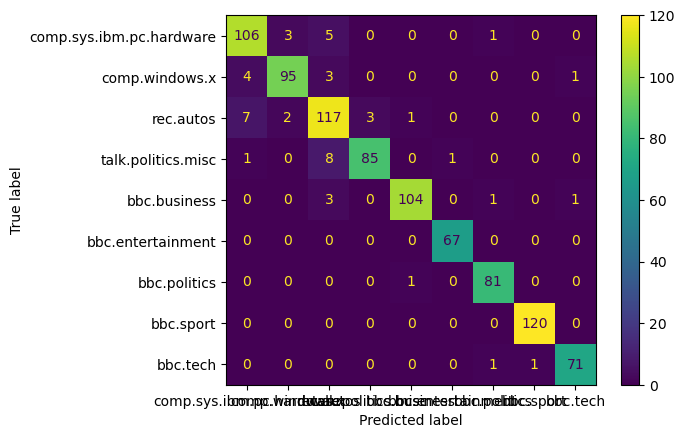

In [71]:
cmSVC = metrics.confusion_matrix(testY, LSVCpredict)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = targetnames)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmSVC, display_labels = targetnames)
cm_display.plot()
plt.show()

In [72]:
# Reference
# 0 = alt.atheism',
# 1 = comp.graphics',
# 2 = comp.os.ms-windows.misc',
# 3 = comp.sys.ibm.pc.hardware',
# 4 = comp.sys.mac.hardware',
# 5 = comp.windows.x',
# 6 = misc.forsale',
# 7 = rec.autos',
# 8 = rec.motorcycles',
# 9 = rec.sport.baseball',
# 10 = rec.sport.hockey',
# 11 = sci.crypt',
# 12 = sci.electronics',
# 13 = sci.med',
# 14 = sci.space',
# 15 = soc.religion.christian',
# 16 = talk.politics.guns',
# 17 = talk.politics.mideast',
# 18 = talk.politics.misc',
# 19 = talk.religion.misc
# 20 = bbc.business','
# 21 = bbc.entertainment','
# 22 = bbc.politics
# 23 = bbc.sport
# 24 = bbc.tech


In [73]:
print(metrics.confusion_matrix(testY, LSVCpredict))

[[106   3   5   0   0   0   1   0   0]
 [  4  95   3   0   0   0   0   0   1]
 [  7   2 117   3   1   0   0   0   0]
 [  1   0   8  85   0   1   0   0   0]
 [  0   0   3   0 104   0   1   0   1]
 [  0   0   0   0   0  67   0   0   0]
 [  0   0   0   0   1   0  81   0   0]
 [  0   0   0   0   0   0   0 120   0]
 [  0   0   0   0   0   0   1   1  71]]
